# An intro to Monte Carlo Sampling 

### By Andrew Projansky 

Monte Carlo Sampling is a powerful tool used throughout computational studies throughout the sciences. 
\indent In the example below, our goal is to estimate the value of Pi using the Monte Carlo method. There are numerous ways to calculate pi, though one very clean one is to consider the ratio of a circle inscribed in a square. Defining a circle with radius equal to $0.5$ and a square with radius $1$, we can compute the ratio between the two areas and find, for ratio of areas $A$,
    \begin{align*}
        A &= \frac{\pi (0.5)^2}{1^2} \\
        &= \frac{\pi}{4}
    \end{align*}
we can quickly solve for and find that $\pi = 4A$. It is pretty easy for a computer to do this calculation (most computers know what pi is) but for this exersize lets assume it didn't know what pi was. Though this may seem like overkill for estimating pi, the methods we will use are useful for problems in which solutions for different quantities are not tractible, such as difficult problems in physics regarding a numerous amount of coupled degrees of freedom. 

   So we'll assume we do not know what pi is. An clever way to estimate is to randomly generate a number of points within the square, and ask if those points are inside the inscribed circle. If they are, then we add them to a counter. At the end of our point generation, the ratio of the points inside the circle versus our total points is an approximation between the area of the circle versus the square, and four times this should be an approximation of pi. 
   
   By randomly sampling a finite selection of points, rather than calculate the areas directly we approximate them just with random sampling, and the question of if our point is inside the circle or not. Of course the accuracy of this approximation depends on the number of points you're willing to sample; if you run the code below and choose the variable 'depth' to be a small number, you'll find inaccurate approximations of pi. However, as the value of 'depth' grows, and we sample more points, the estimated value of pi should get more and more accurate. Try varying the number of sampled points between 10 and 10000, and observe the change in accuracy. You might also observe that if you keep the same number of sampled points between runs, the estimated value of pi still changes, due to the points being different each run. 

3.204


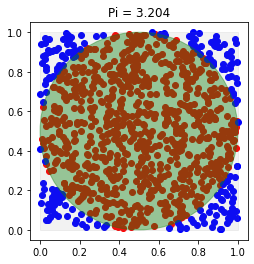

In [40]:
"""
Estimating Pi With Monte Carlo Sampling:

Using Monte-Carlo random sampling to estimate pi by taking the ratio of
points generated inside and outside of a circle nested in a sphere

Written by Andrew Projansky: 8/22/2022

***
Need to figure out best way to slide between multiple graphs of different depths
***
"""
import matplotlib.pyplot as plt
import random
import numpy as np

"""
monte_run: for number of sampling points, randomly generates position and
checks if inside or outside a circle
----------
Inputs:
    depth: int
        integer count of the number of random points to be generated

Outputs:
    xpos_I: list
        list of x values for points inside circle
    ypos_I: list
        list of y values for points inside circle, corresponding to xpos_I
    xpos_O: list
        list of x values for points outside circle
    ypos_O: list
        list of y values for points outside circle, corresponding to xpos_O
    pi: float
        approximation of pi based on 4 times the ration of points inside circle
        versus total points 


"""
def monte_run(depth):

    xpos_I = []
    ypos_I = []
    xpos_O = []
    ypos_O = []
    for i in range(depth):
        point_gen = [random.random(), random.random()]
        dist = np.sqrt((0.5-point_gen[0])**2 + (0.5-point_gen[1])**2)
        if dist < 0.5:
            xpos_I.append(point_gen[0])
            ypos_I.append(point_gen[1])
        else:
            xpos_O.append(point_gen[0])
            ypos_O.append(point_gen[1])
    pi = 4*(len(xpos_I)/(len(xpos_I)+len(xpos_O)))
    print(pi)
    return xpos_I, ypos_I, xpos_O, ypos_O, pi

def display(xpos_I, ypos_I, xpos_O, ypos_O, pi, depth):

    circle = plt.Circle((0.5, 0.5), 0.5, alpha=0.4, color = 'green')
    square = plt.Rectangle((0,0), 1, 1, alpha=0.1, color = 'gray')
    fig, ax = plt.subplots()

    ax.add_patch(circle)
    ax.add_patch(square)
    ax.scatter(xpos_I, ypos_I, color='r')
    ax.scatter(xpos_O, ypos_O, color='b')
    ax.set_aspect('equal', adjustable='box')

    plt.title('Pi = ' + str(pi))
    plt.show()

###
depth = 1000
xpos_I, ypos_I, xpos_O, ypos_O, pi = monte_run(depth)
display(xpos_I, ypos_I, xpos_O, ypos_O, pi, depth)
